In [7]:
from pandas.io.json import json_normalize
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.gridspec import GridSpec
from IPython.display import HTML



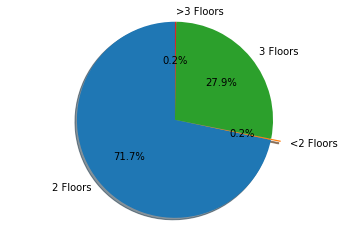

In [8]:

client = MongoClient()
db = client.test
collection = db['HmoListHillingdon']
cursor = list(collection.find({}, {'_id': False}))
result = json_normalize(cursor)
lessthen2room=0
morethe3room=0
tworoom=0
threeroom=0

for index, row in result.iterrows():
    if int(row['Floors']) == 2:
        tworoom=tworoom+1
    elif int(row['Floors']) == 3:
        threeroom=threeroom+1
    elif int(row['Floors']) < 2:
        lessthen2room=lessthen2room+1
    elif int(row['Floors']) > 3:
        morethe3room=morethe3room+1

labels =  '2 Floors', '<2 Floors', '3 Floors', '>3 Floors' 
sizes = [tworoom,lessthen2room, threeroom, morethe3room]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


